## <font color='blue'>Neural net experiments</font>

In [2]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

### <font color='blue'>1. Various helper functions</font>

This function loads in a data set

In [3]:
def load_data(datafile):
    data = np.loadtxt(datafile)
    n,p = data.shape
    rawx = data[:,0:2]
    rawy = data[:,2]
    x = torch.tensor(rawx, dtype=torch.float)
    y = torch.reshape(torch.tensor((rawy+1.0)/2.0, dtype=torch.float), [n,1])
    return x,y

This function plots the data set

In [4]:
def plot_data(x,y):
    x_min = min(x[:,0]) - 1
    x_max = max(x[:,0]) + 1
    y_min = min(x[:,1]) - 1
    y_max = max(x[:,1]) + 1
    pos = (torch.squeeze(y) == 1)
    neg = (torch.squeeze(y) == 0)
    plt.plot(x[pos,0], x[pos,1], 'ro')
    plt.plot(x[neg,0], x[neg,1], 'k^')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.show()

This function plots a decision boundary as well as the data points

In [5]:
def plot_boundary(x,y,model):
    
    x_min = min(x[:,0]) - 1
    x_max = max(x[:,0]) + 1
    y_min = min(x[:,1]) - 1
    y_max = max(x[:,1]) + 1

    delta = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
    grid = np.c_[xx.ravel(), yy.ravel()]
    gn, gp = grid.shape
    Z = np.zeros(gn)
    for i in range(gn):
        pred = model(torch.tensor(grid[i,:], dtype=torch.float))
        Z[i] = int(pred > 0.5)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)

    # Plot also the training points
    pos = (torch.squeeze(y) == 1)
    neg = (torch.squeeze(y) == 0)
    plt.plot(x[pos,0], x[pos,1], 'ro')
    plt.plot(x[neg,0], x[neg,1], 'k^')

    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.show()

This function computes the error rate of the predicted labels `y1` given the true labels `y2`.


In [6]:
def error_rate(y1, y2):
    sum = 0.0
    for i in range(0,y1.size()[0]):
        sum += ((y1[i]-0.5) * (y2[i]-0.5) <= 0.0)
    return int(sum)

### <font color='blue'>2. Experiments with toy data</font>

Let's load in one of the data sets and print it.

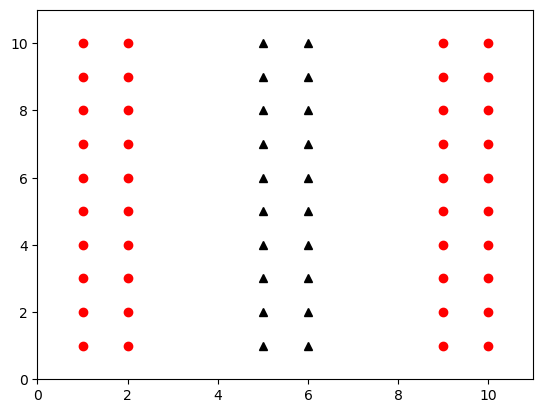

In [26]:
x,y = load_data('data5.txt')
plot_data(x,y)

Next, we train a feedforward net on it. This takes many iterations of gradient descent (backpropagation). We'll print the status every 1000 iterations.

In [ ]:
# Now train a neural net
#
# d is input dimension
# H is hidden dimension
d = 2
H = 4

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(d, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 1),
    torch.nn.Sigmoid()
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.BCELoss()

prev_loss = 1.0
learning_rate = 0.25
done = False
t = 1
tol = 1e-4
while not(done):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    t = t+1
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print('Iteration %d: loss %0.5f errors %d' % 
              (t, loss.item(), error_rate(y_pred, y)))
        if (prev_loss - loss.item() < tol):
            done = True
        prev_loss = loss.item()

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * (1.0/np.sqrt(t)) * param.grad
print("Number of training errors:", error_rate(model(x), y))

Iteration 1000: loss 0.64005 errors 20
Iteration 2000: loss 0.63893 errors 20
Iteration 3000: loss 0.63833 errors 20
Iteration 4000: loss 0.63796 errors 20
Iteration 5000: loss 0.63768 errors 20
Iteration 6000: loss 0.63561 errors 20
Iteration 7000: loss 0.62872 errors 20
Iteration 8000: loss 0.62060 errors 20
Iteration 9000: loss 0.61403 errors 20
Iteration 10000: loss 0.60917 errors 20
Iteration 11000: loss 0.60300 errors 20
Iteration 12000: loss 0.59053 errors 20
Iteration 13000: loss 0.56103 errors 20
Iteration 14000: loss 0.51989 errors 20
Iteration 15000: loss 0.48698 errors 20
Iteration 16000: loss 0.45898 errors 20
Iteration 17000: loss 0.43495 errors 14
Iteration 18000: loss 0.41290 errors 12
Iteration 19000: loss 0.39173 errors 11
Iteration 20000: loss 0.37123 errors 9
Iteration 21000: loss 0.35154 errors 8
Iteration 22000: loss 0.33301 errors 7
Iteration 23000: loss 0.31535 errors 6
Iteration 24000: loss 0.29868 errors 6
Iteration 25000: loss 0.28302 errors 5
Iteration 26000

Now let's see what kind of a boundary we got!

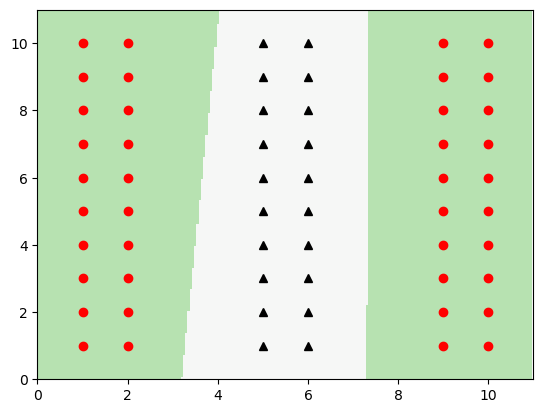

In [28]:
plot_boundary(x,y,model)

### <font color='blue'>3. A different data set</font>

The code in the next cell generates a data set of 800 points in which the labels are noisy.

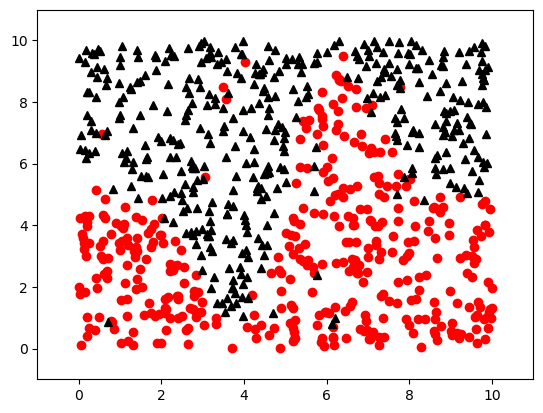

In [ ]:
n = 800
np.random.seed(0)
X_train = np.random.rand(n,2)
x1 = X_train[:,0]
x2 = X_train[:,1]
y_train = ((np.exp(-((x1-0.5)*6)**2)*2*((x1-0.5)*6)+1)/2-x2)>0 

idx = np.random.choice(range(n),size=(int(n*0.03),))
y_train[idx] = ~y_train[idx]
x = torch.tensor(X_train, dtype=torch.float) * 10
y = torch.reshape(torch.tensor(y_train, dtype=torch.float), [n,1])
plot_data(x,y)

<font color='magenta'>Define a neural net with <b>two</b> hidden layers, each containing the same number of nodes. <em>Hint:</em> Start with the code above and just make a small tweak to it.</font>

<font color='magenta'>Train the net a few times, and print the decision boundary for the best (lowest-error) model that you find.</font>

In [48]:
# Now train a neural net
#
# d is input dimension
# H is hidden dimension
d = 2
H = 4

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(d, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H,H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 1),
    torch.nn.Sigmoid()
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.BCELoss()

prev_loss = 1.0
learning_rate = 0.25
done = False
t = 1
tol = 1e-4
while not(done):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    t = t+1
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print('Iteration %d: loss %0.5f errors %d' % 
              (t, loss.item(), error_rate(y_pred, y)))
        if (prev_loss - loss.item() < tol):
            done = True
        prev_loss = loss.item()

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * (1.0/np.sqrt(t)) * param.grad
print("Number of training errors:", error_rate(model(x), y))

Iteration 1000: loss 0.44754 errors 149
Iteration 2000: loss 0.43559 errors 142
Iteration 3000: loss 0.43002 errors 141
Iteration 4000: loss 0.42741 errors 144
Iteration 5000: loss 0.42577 errors 144
Iteration 6000: loss 0.42447 errors 144
Iteration 7000: loss 0.42334 errors 143
Iteration 8000: loss 0.42245 errors 143
Iteration 9000: loss 0.42173 errors 142
Iteration 10000: loss 0.42110 errors 141
Iteration 11000: loss 0.42053 errors 139
Iteration 12000: loss 0.42004 errors 136
Iteration 13000: loss 0.41960 errors 137
Iteration 14000: loss 0.41922 errors 138
Iteration 15000: loss 0.41884 errors 137
Iteration 16000: loss 0.41849 errors 140
Iteration 17000: loss 0.41819 errors 139
Iteration 18000: loss 0.41791 errors 138
Iteration 19000: loss 0.41766 errors 139
Iteration 20000: loss 0.41744 errors 139
Iteration 21000: loss 0.41723 errors 137
Iteration 22000: loss 0.41703 errors 137
Iteration 23000: loss 0.41685 errors 137
Iteration 24000: loss 0.41666 errors 137
Iteration 25000: loss 0.4

Iteration 199000: loss 0.31950 errors 116
Iteration 200000: loss 0.31887 errors 116
Iteration 201000: loss 0.31823 errors 114
Iteration 202000: loss 0.31759 errors 114
Iteration 203000: loss 0.31689 errors 112
Iteration 204000: loss 0.31605 errors 111
Iteration 205000: loss 0.31520 errors 111
Iteration 206000: loss 0.31435 errors 111
Iteration 207000: loss 0.31336 errors 111
Iteration 208000: loss 0.31232 errors 109
Iteration 209000: loss 0.31132 errors 109
Iteration 210000: loss 0.31031 errors 109
Iteration 211000: loss 0.30938 errors 107
Iteration 212000: loss 0.30848 errors 107
Iteration 213000: loss 0.30756 errors 106
Iteration 214000: loss 0.30667 errors 106
Iteration 215000: loss 0.30584 errors 105
Iteration 216000: loss 0.30505 errors 105
Iteration 217000: loss 0.30429 errors 105
Iteration 218000: loss 0.30355 errors 105
Iteration 219000: loss 0.30282 errors 105
Iteration 220000: loss 0.30211 errors 105
Iteration 221000: loss 0.30141 errors 105
Iteration 222000: loss 0.30074 err

Iteration 398000: loss 0.22857 errors 52
Iteration 399000: loss 0.22836 errors 52
Iteration 400000: loss 0.22815 errors 52
Iteration 401000: loss 0.22795 errors 52
Iteration 402000: loss 0.22774 errors 52
Iteration 403000: loss 0.22754 errors 52
Iteration 404000: loss 0.22734 errors 52
Iteration 405000: loss 0.22715 errors 52
Iteration 406000: loss 0.22694 errors 52
Iteration 407000: loss 0.22675 errors 52
Iteration 408000: loss 0.22654 errors 52
Iteration 409000: loss 0.22634 errors 52
Iteration 410000: loss 0.22615 errors 52
Iteration 411000: loss 0.22596 errors 52
Iteration 412000: loss 0.22577 errors 52
Iteration 413000: loss 0.22558 errors 52
Iteration 414000: loss 0.22539 errors 51
Iteration 415000: loss 0.22521 errors 51
Iteration 416000: loss 0.22502 errors 51
Iteration 417000: loss 0.22484 errors 51
Iteration 418000: loss 0.22466 errors 51
Iteration 419000: loss 0.22448 errors 51
Iteration 420000: loss 0.22430 errors 51
Iteration 421000: loss 0.22413 errors 51
Iteration 422000

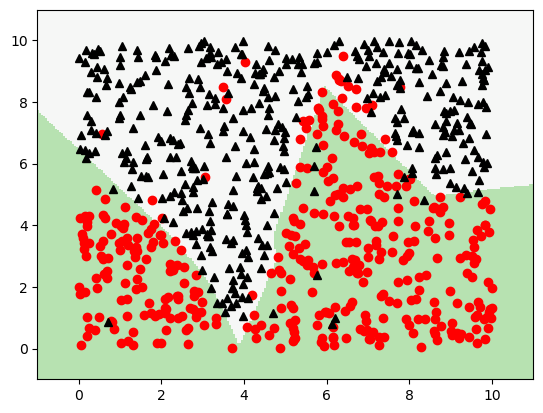

In [49]:
plot_boundary(x,y,model)